## Давайте на примере подробно разберём проектирование экспериментов и построение пайплайна. 

### Первым этапом данных является загрузка данных: 

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\govor\AppData\Local\Temp\ipykernel_7048\1702592043.py:3: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\SkillFactory\учебный материал\data\KaggleV2-May-2016.csv")


Text(0.5, 1.0, 'Соотношение людей, которые пропускали прием и нет')

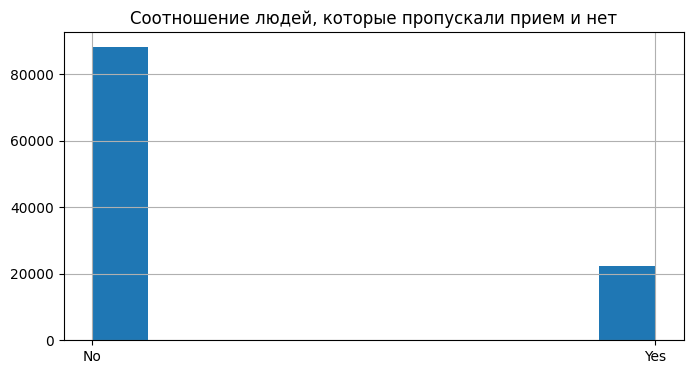

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("C:\SkillFactory\учебный материал\data\KaggleV2-May-2016.csv")
# Создаем поле для графика
plt.figure(figsize=(8,4))
# Создаем гистрограмму 
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускали прием и нет')


Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:
- Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
- Кто не появляется чаще — мужчины или женщины?

In [29]:
# Для более точных цифр
df['No-show'].value_counts(normalize=True).round(3)

No-show
No     0.798
Yes    0.202
Name: proportion, dtype: float64

In [30]:
# Кто не посещает больше
df[df['No-show']=='Yes']['Gender'].value_counts(normalize=True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для one-hot кодировки можно воспользоваться методом get_dummies() библиотеки pandas:

In [31]:
categorical_lolumns=['Gender', 'Neighbourhood']
encoding_columns=pd.get_dummies(df, columns=categorical_lolumns)

In [32]:
import os.path
import logging
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [33]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2025-04-06 22:27:57,804: Data
INFO: 2025-04-06 22:27:57,806: Data shape (110527, 14)
C:\Users\govor\AppData\Local\Temp\ipykernel_7048\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2025-04-06 22:27:57,821: Percentage of women: 0.653882342398853
C:\Users\govor\AppData\Local\Temp\ipykernel_7048\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2025-04-06 22:27:57,831: P

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : successful_butter_5365
COMET INFO:     url                   : https://www.comet.com/govoridaa/medical-appointment/6e1437cecd56476db979b2e2090d8a39
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.65 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` whe

{'web': 'https://www.comet.com/api/image/download?imageId=f478cbf7290f455e8c04d1644f75864d&experimentKey=d4c37b2e7aad4873b378674ea9c52fa1',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=f478cbf7290f455e8c04d1644f75864d&experimentKey=d4c37b2e7aad4873b378674ea9c52fa1',
 'imageId': 'f478cbf7290f455e8c04d1644f75864d'}

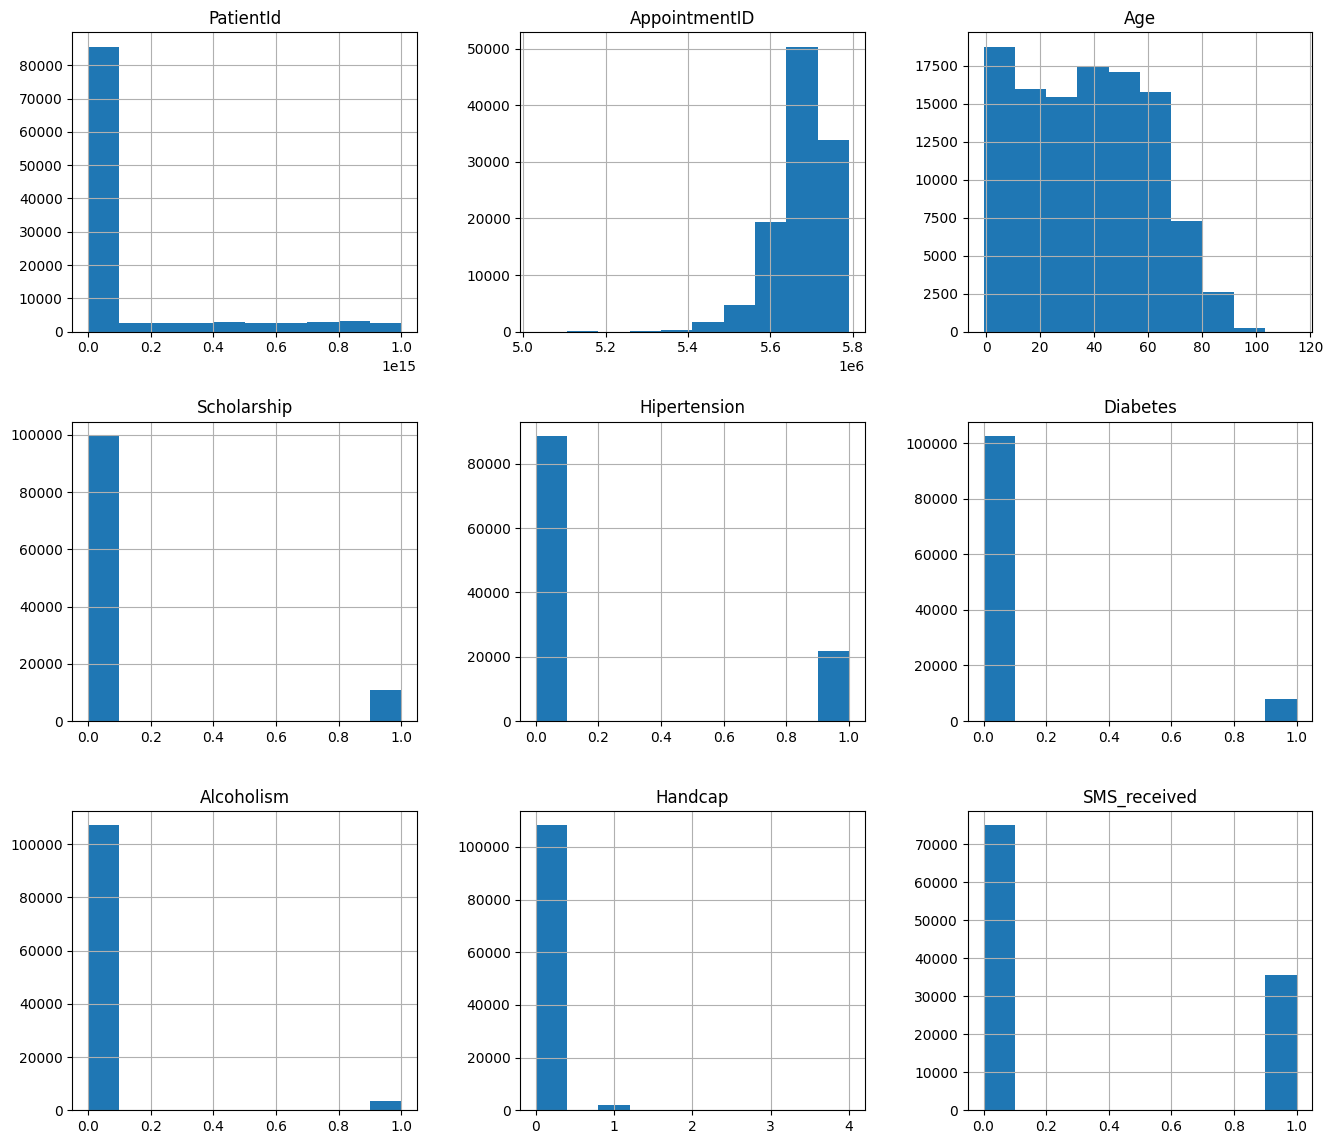

In [34]:
from comet_ml import Experiment
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="qIFBHKLfo88uBxDf0yV5XYzi0",
    project_name="medical-appointment",
    workspace="govoridaa",
)
df.hist(figsize=(16,14))
# логируем гистрограму
experiment.log_figure(figure=plt)

Проанализируем число людей каждого возвраста 

In [35]:
print(f'Уникальные значения в Age => {df.Age.unique()}')
# Удаляем онамальные значения
df=df[(df.Age>=0)&(df.Age<=110)]
df.Age.value_counts()
display(df.info())

Уникальные значения в Age => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 

None

In [36]:
# Закодируем категориальные признаки
categorical_columns_name=['Gender', 'Neighbourhood']
encoded_columns=pd.get_dummies(df, columns= categorical_columns_name)
# Удалим ненужные признаки
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace=True)
# занесем целевой признак No-show в отлельную переменную
y=df['No-show']
# закодируем данные признака No-show
y=y.replace({'No':0, 'Yes':1})
y.value_counts(True)

C:\Users\govor\AppData\Local\Temp\ipykernel_7048\3232976076.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace({'No':0, 'Yes':1})


No-show
0    0.798084
1    0.201916
Name: proportion, dtype: float64

## Шкалирование данных

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(encoded_columns)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 